# Fast stream Movie Recommender System

![image](./images/images.png)

***
* __Group 10
* Student names:
    * Allan Kiplagat : https://github.com/Allan-Kipkemei
    * Esther Njagi  : https://github.com/emukami2
    * Benedict Kuloba :https://github.com/myles-G
    
* Student pace: DFT08
* Scheduled project review date/time: 
* Instructor name: Asha Deen

***

### Table of Contents

1. [Business Understanding](#business-understanding)
   - Introduction to the business problem and objectives.
   - 
2. [Data Understanding](#data-understanding)
   - Overview of the dataset and its features.
3. [Data Preprocessing](#data-preprocessing)
   - Steps taken to clean and prepare the data for analysis.
4. [Exploratory Data Analysis](#exploratory-data-analysis)
   - Insights and patterns discovered through data exploration.
5. [Generating the Recommendation System](#generating-the-recommendation-system)
   - Methods and techniques used to build the recommendation system.
6. [Conclusion and Recommendations](#conclusion-and-recommendations)
   - Summary of findings and suggested next steps.


## Overview


**Objective:**
The goal of this project is to design and implement a movie recommender system that provides personalized recommendations to users based on their preferences and viewing history. The system employs various collaborative and content-based filtering techniques to enhance the accuracy and relevance of movie suggestions.

**Key Components:**

1. **Data Collection:**
   - Utilized a movie dataset containing information about movies, genres, user ratings, and tags.
   - Explored and cleaned the dataset to prepare it for modeling.

2. **Exploratory Data Analysis (EDA):**
   - Analyzed the dataset to understand its structure, features, and distributions.
   - Visualized key patterns, such as user preferences and movie popularity, to gain insights.

3. **Content-Based Filtering:**
   - Implemented a content-based recommender system using movie genres.
   - Explored the use of TF-IDF vectors to represent movie content and calculate similarities.

4. **Neighborhood-Based Collaborative Filtering (KNN):**
   - Implemented a neighborhood-based collaborative filtering model using SciKit Learn's KNN.
   - Explored both user-based and item-based collaborative filtering approaches.
   - Evaluated the model's performance using metrics such as RMSE and MAE.

5. **Model-Based Collaborative Filtering (SVD):**
   - Implemented a model-based collaborative filtering approach using the Surprise library and Singular Value Decomposition (SVD).
   - Evaluated the model's performance and explored hyperparameter tuning.

6. **Hybrid Approach:**
   - Recommended a hybrid model that combines the strengths of content-based and collaborative filtering approaches.
   - Highlighted the potential benefits of leveraging both user-item interactions and content features.


Business Understanding:
=======

Objective:
-------------
The primary objective of the recommender system project is to enhance user satisfaction and engagement on the MovieLens platform by delivering personalized and relevant movie recommendations. The recommender system aims to provide users with tailored suggestions based on their historical movie ratings and tagging activities, ultimately improving their overall experience.

Scope:
-------------
The project will focus on implementing a collaborative filtering-based recommender system, leveraging the ml-latest-small dataset from MovieLens. The recommendations will be centered around user preferences, ensuring that users discover movies aligned with their tastes and interests. The scope includes both explicit ratings and user-generated tags as valuable indicators of user preferences.

Success Criteria:
-------------
The success of the recommender system will be evaluated based on several key performance indicators (KPIs):
##### User Engagement:
Increase in the number of user interactions with the platform, including ratings, tags, and time spent on the website.
##### Recommendation Accuracy:
Improvement in the precision and relevance of movie recommendations, reducing instances of irrelevant or disliked suggestions.
#####  User Satisfaction:
Positive feedback from users, measured through surveys, reviews, and user ratings.
##### Platform Adoption:
Growth in the number of registered users and active users leveraging the recommendation features.

Data Understanding:
=======

## Data Source:

The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were 
generated by 610 users between March 29, 1996, and September 24, 2018.

The data used in this project will be pulled from 4 different separate file:

##### 1. Movies Data (movies.csv):

Contains movie information, including titles and genres.

Columns: 

 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).


##### 2. Links Data (links.csv):

Provides identifiers for linking to external movie-related sources (IMDb, TMDb).

Columns:

* movieId: Unique identifier for each movie, consistent with other data files.

* imdbId: Identifier for movies used by IMDb (Internet Movie Database).

* tmdbId: Identifier for movies used by TMDb (The Movie Database).

##### 3. Ratings Data (ratings.csv):


Each entry represents a user's rating for a specific movie.

Contains user ratings on a 5-star scale for movies.

Columns: 

* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

##### 4. Tags Data (tags.csv):

Contains user-generated metadata (tags) about movies.

Columns: 
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [210]:
# File paths for the datasets

import pandas as pd

movies = "data/ml-latest-small/movies.csv"
links = "data/ml-latest-small/links.csv"
ratings = "data/ml-latest-small/ratings.csv"
tags = "data/ml-latest-small/tags.csv"

# Dictionary to store the dataframes
data = {"movies": None, "links": None, "ratings": None, "tags": None}

# Loop through the dictionary keys and read the corresponding CSV files into pandas DataFrames
for key in data.keys():
    data[key] = pd.read_csv(f"data/ml-latest-small/{key}.csv")


#### EXPLORING DATAFRAMES

Datasets Lengths

In [211]:
# Print the length (number of rows) of each dataset
print("Length of each data-set:")

# Iterate through the dictionary items
for k, v in data.items():
    # Print the name of the dataset and its length
    print(k, ":", len(v))


Length of each data-set:
movies : 9742
links : 9742
ratings : 100836
tags : 3683


Top five of each:

In [212]:
data["movies"].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [213]:
data["links"].head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [214]:
data["ratings"].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [215]:
data["tags"].head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [216]:
# Print a summary of each dataset
print("Summary of each data-set:\n")

# Iterate through the dictionary items
for k, v in data.items():
    # Print the name of the dataset
    print(k, "\n")
    # Print the summary information of the dataset
    print(v.info())
    # Print a separator line for clarity
    print("="*100, "\n")


Summary of each data-set:

movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

links 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movie

In [208]:
# Print a header for the columns of each dataset
print("Columns of each data-set:\n")

# Initialize an empty list to store all column names
all_columns = []

# Iterate over each item in the 'data' dictionary
for k, v in data.items():
    # Print the name of the dataset (or key in the dictionary)
    print(k, "\n")
    
    # Add the columns of the current DataFrame to the list of all columns
    all_columns += list(v.columns)
    
    # Print the columns of the current DataFrame
    print(list(v.columns))
    
    # Print a separator line for readability
    print("="*100, "\n")

# Print the set of all unique columns across all datasets
print("All unique columns:", set(all_columns))


Columns of each data-set:

movies 

['movieId', 'title', 'genres']

links 

['movieId', 'imdbId', 'tmdbId']

ratings 

['userId', 'movieId', 'rating', 'timestamp']

tags 

['userId', 'movieId', 'tag', 'timestamp']

All unique columns: {'imdbId', 'title', 'genres', 'userId', 'rating', 'movieId', 'tmdbId', 'tag', 'timestamp'}


### MERGING DATAFRAMES

merging the datasets is essential to be able to work with different dataset at one

In [204]:
# Extract the movies and links dataframes from the dictionary
movies_df = data["movies"]
links_df = data["links"]

# Merge the movies dataframe with the links dataframe using an inner join
# The 'movieId' column is used as the key for the join
merged_movies_links = movies_df.join(links_df.set_index("movieId"), on="movieId", how="inner")

# Display the shape (number of rows and columns) of the resulting merged DataFrame
print(merged_movies_links.shape)


(9742, 5)


In [205]:
merged_movies_links.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [206]:
# Left outer join with ratings_df and specify suffixes
merged_data_ratings = merged_movies_links.join(data["ratings"].set_index("movieId"), on="movieId", how="left", lsuffix='_movies_links', rsuffix='_ratings')

# Left outer join with tags_df and specify suffixes
df = merged_data_ratings

# Display the first few rows of the resulting DataFrame
print(f"Final Merged Data has {df.shape[0]} rows and {df.shape[1]} columns:")
df.head()

Final Merged Data has 100854 rows and 8 columns:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09


In [108]:
df[['userId', "movieId"]]

,userId,movieId
0,1.0,1
0,5.0,1
0,7.0,1
0,15.0,1
0,17.0,1
...,...,...
9737,184.0,193581
9738,184.0,193583
9739,184.0,193585
9740,184.0,193587


In [109]:
# Print the dimensions of the final DataFrame
print(f"The Final dataframe has {df.shape[0]} rows and {df.shape[1]} columns")


The Final dataframe has 100854 rows and 8 columns


## Data Cleaning:

#### Dealing with missing values:

In [110]:
# Check for missing values in each column of the DataFrame
missing_values = df.isna().sum()

# Iterate through each column and the number of missing values
for column, count in missing_values.items():
    # Print a message if there are missing values in the column
    if count > 0:
        print(f"The {column} column has {count} missing values")


The tmdbId column has 13 missing values
The userId column has 18 missing values
The rating column has 18 missing values
The timestamp column has 18 missing values


In [111]:
# Calculate the percentage of missing values in each column of the DataFrame
missing_percentage = df.isna().mean() * 100

# Filter out columns with no missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Create a DataFrame to display the columns and their percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})

# Print a header for the missing values table
print("Percentage of Missing Values")

# Display the DataFrame with the missing values information
missing_table


Percentage of Missing Values


,Columns,% of Missing Values
0,tmdbId,0.012890
1,userId,0.017848
2,rating,0.017848
3,timestamp,0.017848


In [112]:
# dropped all the missing values in tmdbId,userId_x,timestamp_x,userId_y,tag,timestamp_y columns
# 	movieId	title	genres	imdbId	tmdbId	userId	rating	timestamp	userId_tags	tag	timestamp_tags

df.dropna(subset = ['tmdbId', 'userId','timestamp','rating'], inplace=True)

In [113]:
# Calculate the number of missing values in each column of the DataFrame
missing_values1 = df.isna().sum()

# Iterate through each column and the number of missing values
for column, count in missing_values1.items():
    # Print a message for each column that has missing values, along with the count
    print(f"The {column} column has {count} missing values")


The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The imdbId column has 0 missing values
The tmdbId column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


#### Handling duplicates:

In [114]:
# Calculate the number of duplicated rows in the DataFrame
duplicated_rows = df.duplicated().sum()

# Print the number of duplicated rows
print(f'The DataFrame has {duplicated_rows} duplicated rows.')


The DataFrame has 0 duplicated rows.


#### Confirm data types:

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100823 non-null  float64
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.9+ MB


In [116]:
# Converting user IDs and tmdbId to object data type
df[['userId', 'tmdbId']] = df[['userId', 'tmdbId']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  object 
 5   userId     100823 non-null  object 
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


#### Handling Outliers

In [117]:
# OUTLIERS IN RATING COLUMN
df.value_counts(['rating'])

rating
4.0       26816
3.0       20044
5.0       13209
3.5       13134
4.5        8551
2.0        7550
2.5        5550
1.0        2811
1.5        1791
0.5        1367
Name: count, dtype: int64

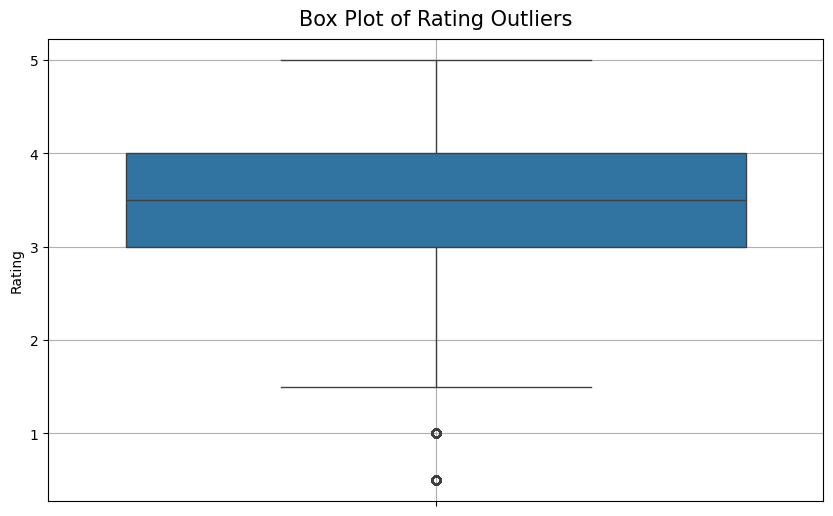

The maximum rating is 5.0
The minimum rating is 0.5


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize outliers in the 'rating' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['rating'])
plt.title('Box Plot of Rating Outliers', fontsize=15, pad=10)
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Calculate the maximum and minimum ratings
max_rating = df['rating'].max()
min_rating = df['rating'].min()

# Print the maximum and minimum ratings
print(f"The maximum rating is {max_rating}")
print(f"The minimum rating is {min_rating}")


The aim of this file is to analyze the distribution of movie ratings in your dataset. Here's a summary of its objectives:

Visualize Rating Distribution:

Box Plot: Create a box plot to visualize the distribution of ratings and identify any outliers. A box plot helps in understanding the spread of the data, the central tendency, and the presence of extreme values or outliers.
Calculate Rating Extremes:

Maximum and Minimum Ratings: Calculate and display the highest and lowest ratings in the dataset. This provides insights into the range of ratings given by users and helps in understanding the variability in the data.
Overall, the file aims to provide both a graphical and numerical summary of the rating data, which can be useful for further analysis and improving the recommendation system

### Exploratory Data Analysis

## Univariate

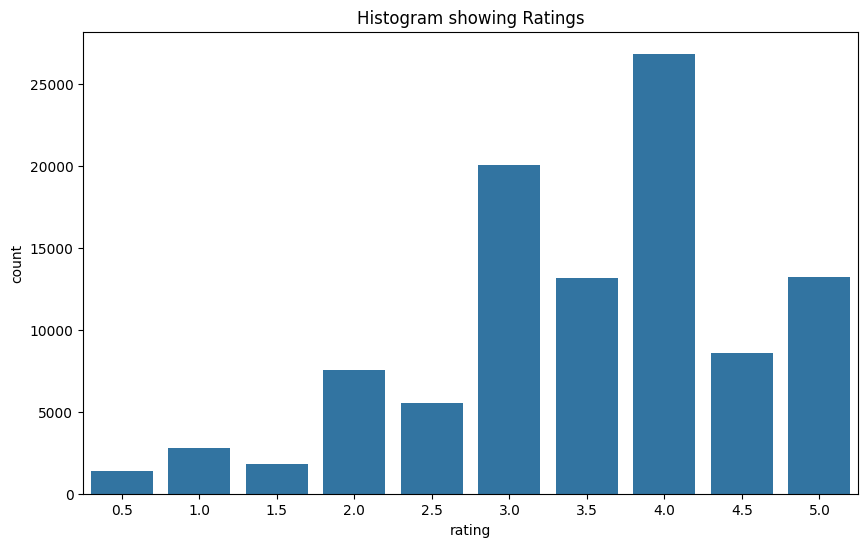

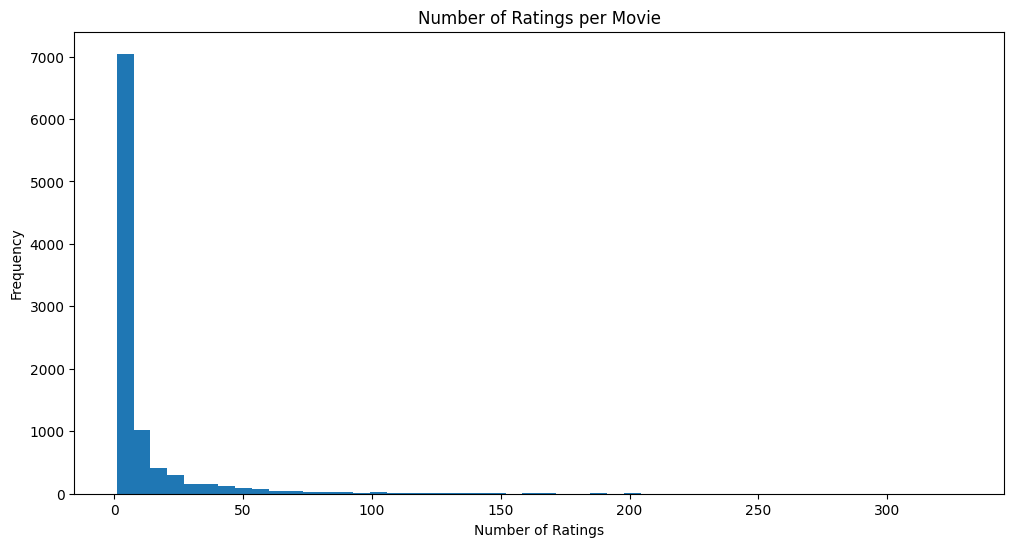

In [119]:

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Histogram showing Ratings')
plt.show()

# Number of ratings per movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_movie['rating'], bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


The majority of ratings are clustered around the higher end of the scale, particularly around 4.0, indicating that users tend to rate movies positively. There are fewer low ratings, suggesting that either the movies are generally well-received, or users are more generous with their ratings. This kind of analysis is crucial for understanding user behavior and preferences, which is essential for building effective recommendation systems.

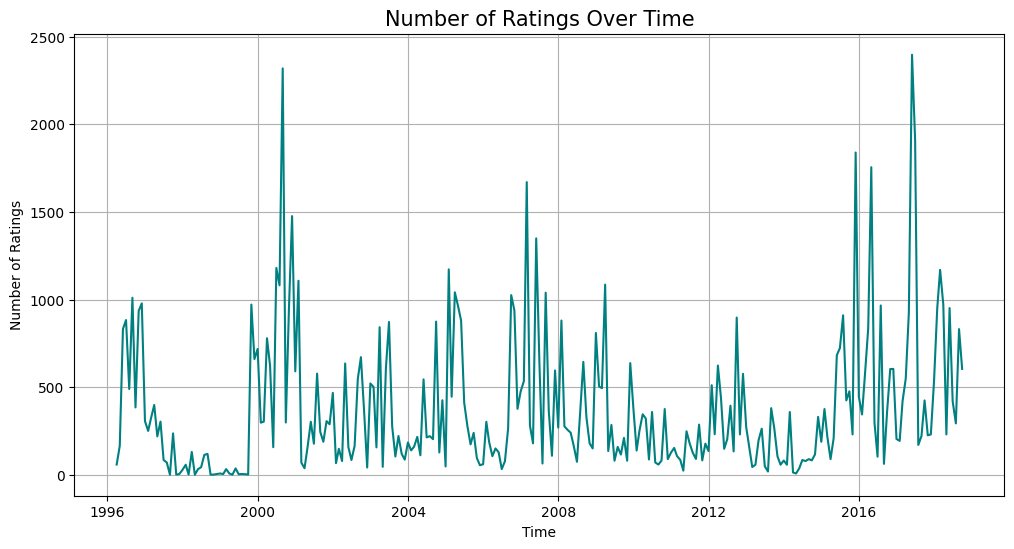

In [120]:

ratings = data["ratings"]

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Create a new DataFrame with monthly counts of ratings
monthly_ratings = ratings.set_index('timestamp').resample('M').size().reset_index(name='count')

# Plot the number of ratings over time using a line plot with a different color
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='count', data=monthly_ratings, color='teal')
plt.title('Number of Ratings vs Time', fontsize=15)
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


The aim of this code is to visualize the trend of the number of ratings over time. By converting timestamps to datetime, aggregating ratings by month, and plotting the results, it helps in understanding how the volume of ratings has changed throughout the dataset.

In [121]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


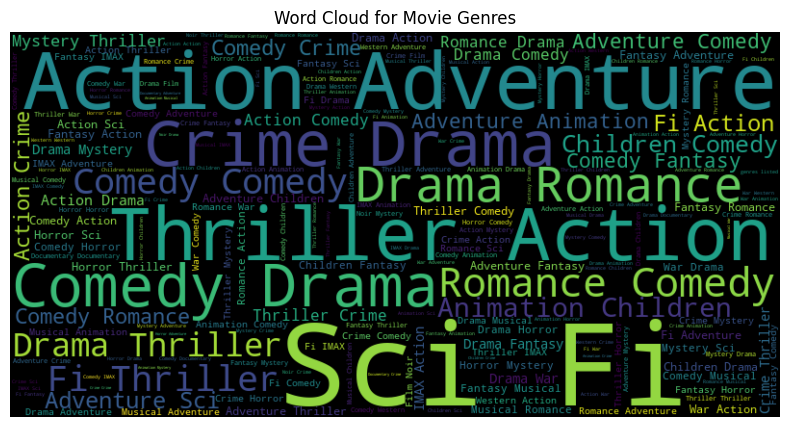

In [209]:
from wordcloud import WordCloud

# Generate a word cloud for movie genres
genre_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['genres']))

plt.figure(figsize=(10, 5))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Genres')
plt.show()

The aim of this code is to create a visual representation of movie genres using a word cloud. It highlights the most frequently occurring genres in the dataset, with more common genres appearing larger, allowing for a quick and intuitive understanding of genre distribution.

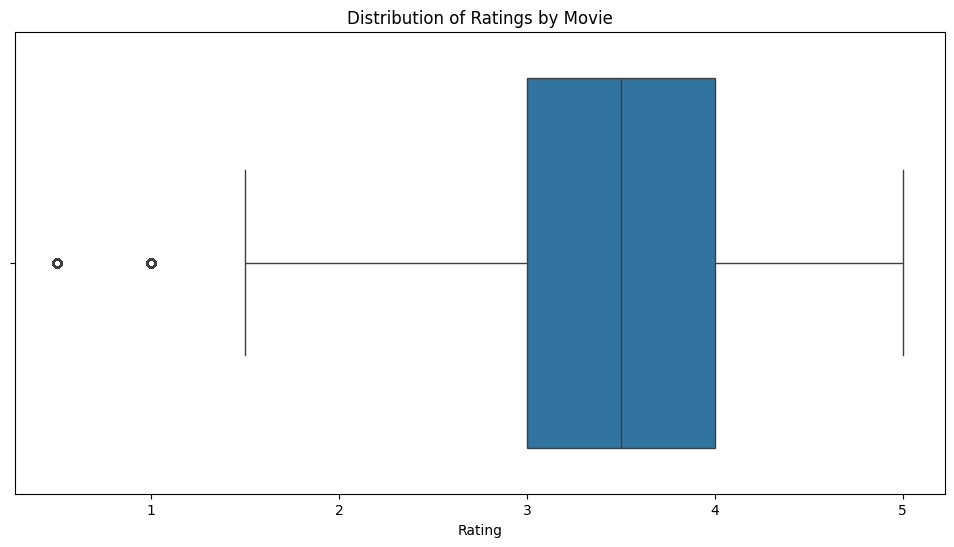

In [123]:
# Boxplot of ratings by movie
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', data=df)
plt.title('Distribution of Ratings by Movie')

plt.xlabel('Rating')
plt.show()

The goal of this code is to visualize the distribution of movie ratings using a boxplot. It helps in understanding the spread, central tendency, and potential outliers in the ratings data across different movies.

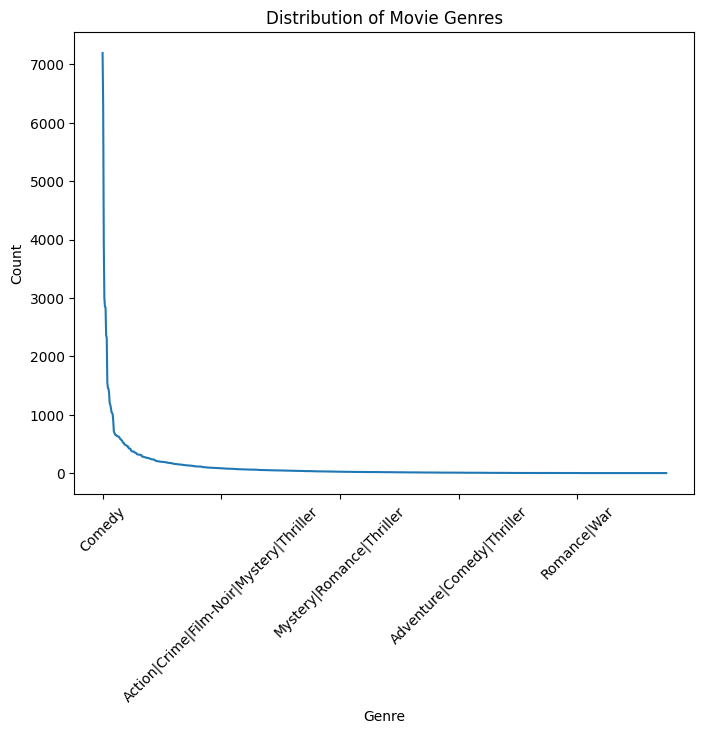

In [124]:
# Creating a lineplot of the 'genre' column

fig, ax = plt.subplots(figsize=(8,6))

genre_counts = df['genres'].value_counts()

# plot the lineplot
genre_counts.plot()

plt.xticks(rotation=45)

#Set the axis labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')

# Show the plot
plt.show();

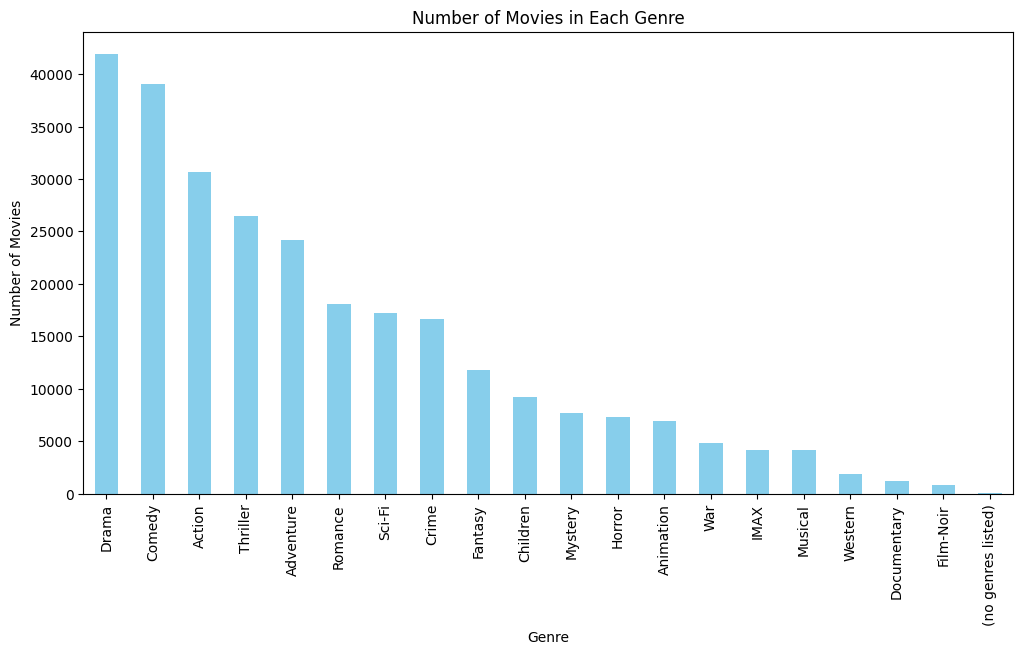

In [125]:
# count of movies in each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

This analysis helps us understand which genres are more prevalent in the dataset, providing insights that can be useful for further analysis or recommendations.


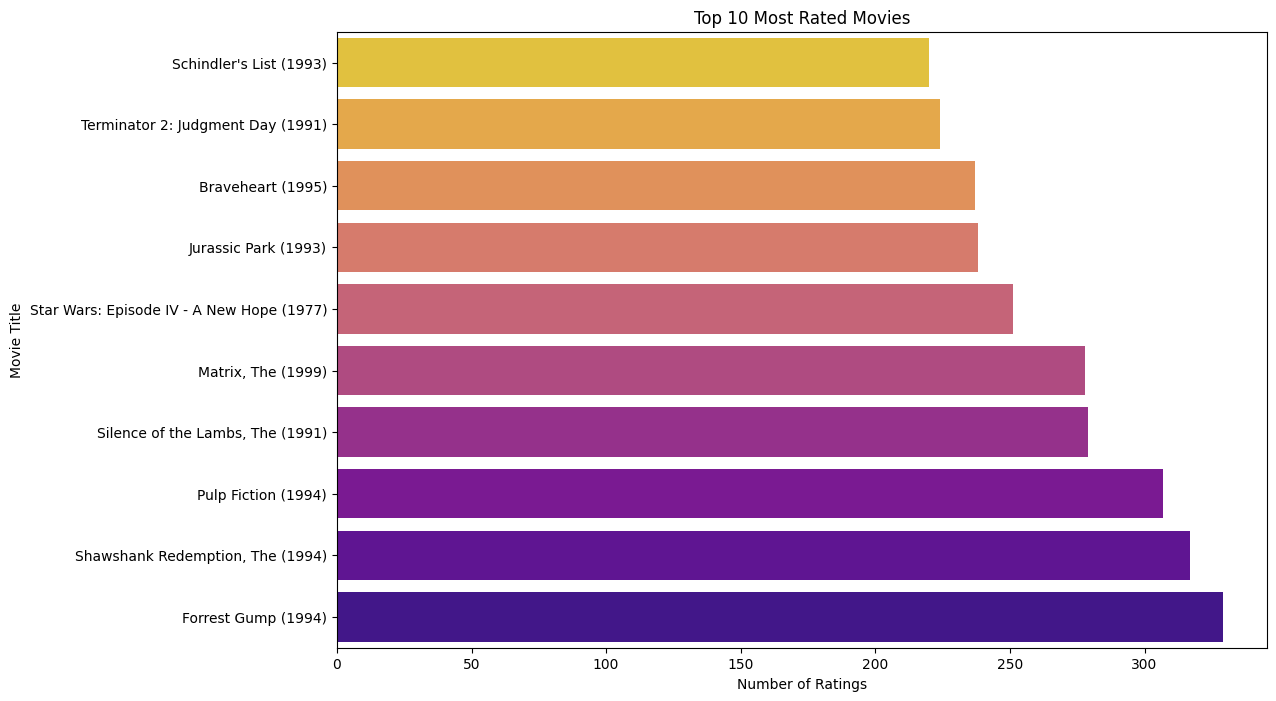

In [176]:

# Top N most rated movies
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='plasma')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ratings on top
plt.show()


Your code snippet for identifying and visualizing the top 10 most rated movies is almost correct, but it has a small issue: it will duplicate titles when merging because df[['movieId', 'title']] may contain duplicate rows. Here's a refined version:

## Generating the Recommender System

It's time to now come up with a recommender system, and for that there are a few choices we have as listed below:

## 1. Personalized Approach

To offer a more tailored user experience, we opt for a personalized recommendation system rather than a generic one. The available methods for personalization include:

- **Content-Based Filtering:** 
  - Recommends movies based on their features, such as genres and descriptions.

- **Collaborative Filtering:**
  - **Memory-Based (KNN):** Utilizes user-item interactions to recommend movies based on similarities between users or items.
  - **Model-Based (Matrix Factorization):**
    - **Singular Value Decomposition (SVD):** Decomposes the user-item interaction matrix into latent factors for recommendations.
    - **Alternating Least Squares (ALS):** Another matrix factorization technique for generating recommendations.

## 2. Unpersonalized Approach

Alternatively, we could recommend the most popular movies across all users. However, this method lacks the customization and specific relevance that a personalized system provides.

## Objective

The goal is to experiment with various recommendation methods and determine which system performs best.


### Content-based filtering:

In the context of this data-set, a content-based recommendation system is one where we recommend a movie similar to one a user likes. We will use the genres for the content-based filtering which is shown below:

In [177]:
# genres in the dataframe
df["genres"]

0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
0       Adventure|Animation|Children|Comedy|Fantasy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: genres, Length: 100823, dtype: object

There is a slight problem though. After merging our dataframe with the ratings, the dataframe expanded from 9742 to 100000+ records, which will present a slight problem with computation.

In [178]:
df.shape

(100823, 8)

So this leads us to use the dataset without the ratings and tags, which we stored in a variable called __merged_movies_links__.

#### Procedure:
- We shall use the __SciKit Learn's TfidfVectorizer__, which is a class from scikit-learn, a popular machine learning library in Python, used for converting a collection of raw text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents.
    - We shall then fit the __genres__ into the TfidfVectorizer which yields a sparse matrix.
- To compute a similarity matrix, we then use a sigmoid kernel, which computes the similarity of movies given the index.

__Note__: As a safety measure, we fill in any NaN values with an empty text to enable the machine learning algorithm to work well

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
merged_movies_links['genres'] = merged_movies_links['genres'].fillna('')
# replace the pipes '|' from the genres with 'commas'
merged_movies_links['genres'] = merged_movies_links['genres'].map(lambda x: ", ".join(x.split("|")))
# genres
merged_movies_links['genres'].head()

0    Adventure, Animation, Children, Comedy, Fantasy
1                       Adventure, Children, Fantasy
2                                    Comedy, Romance
3                             Comedy, Drama, Romance
4                                             Comedy
Name: genres, dtype: object

In [180]:
tfv_matrix = tfv.fit_transform(merged_movies_links['genres'])
tfv_matrix

<9742x402 sparse matrix of type '<class 'numpy.float64'>'
	with 42867 stored elements in Compressed Sparse Row format>

In [181]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [182]:
print("length of the similarity matrix:", len(sig))
print(sig[0])

length of the similarity matrix: 9742
[0.76263689 0.76180765 0.76164424 ... 0.76159416 0.76172628 0.76173151]


We create a reverse map of the movies titles, which helps us get a movie index just by the name as shown:

In [183]:
# reverse mapping of indices and movie titles
indices = pd.Series(merged_movies_links.index, index=merged_movies_links['title']).drop_duplicates()
indices

title
Toy Story (1995)                                0
Jumanji (1995)                                  1
Grumpier Old Men (1995)                         2
Waiting to Exhale (1995)                        3
Father of the Bride Part II (1995)              4
                                             ... 
Black Butler: Book of the Atlantic (2017)    9737
No Game No Life: Zero (2017)                 9738
Flint (2017)                                 9739
Bungo Stray Dogs: Dead Apple (2018)          9740
Andrew Dice Clay: Dice Rules (1991)          9741
Length: 9742, dtype: int64

In [184]:
# test
indices['No Game No Life: Zero (2017)']

9738

In [185]:
list(enumerate(sig[indices['Toy Story (1995)']]))[:5]

[(0, 0.7626368906233343),
 (1, 0.7618076535093508),
 (2, 0.7616442356858768),
 (3, 0.7616291558555321),
 (4, 0.7617315097208257)]

In [186]:
def get_title(text, df=df):
    """Gets movie title matching `text`
    returns:
        title - title of movie matching the input
        genres - the movie's genres 
    """
    mask = df['title'].str.contains(text, case=False, regex=False)
    title = df.loc[mask, 'title'].head(1).values[0] if any(mask) else None
    
    if not title:
        print(f"\n'{text}' does not match any movies. Please try again")
        return None, None

    return title, df.loc[mask].head(1)["genres"].values[0]

In [188]:
# test
print(get_title("Superman (1978)", df))
print()
print(get_title("Jumanji (1995)", df))

('Superman (1978)', 'Action|Adventure|Sci-Fi')

('Jumanji (1995)', 'Adventure|Children|Fantasy')


In [174]:
def give_rec(title, sig=sig):
    """Get the index corresponding to title"""
    try:
        # get title
        title, genres = get_title(title, merged_movies_links)
        
        # print the movie title matching the text
        if title:
            print(f"Recommendation for {title}")
            print("Genres: ", genres)
        
        idx = indices[title]
        
        # Get the pairwsie similarity scores 
        sig_scores = list(enumerate(sig[idx]))

        # Sort the movies 
        sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

        # Scores of the 10 most similar movies
        sig_scores = sig_scores[1:11]

        # Movie indices
        movie_indices = [i[0] for i in sig_scores]

        # Top 10 most similar movies
        return merged_movies_links.iloc[movie_indices].drop_duplicates()
    except Exception as _:
        print(_)
        return "⚠ Oops! Something went wrong!"
    
    
    
# test
give_rec('superman')

Recommendation for Superman (1978)
Genres:  Action, Adventure, Sci-Fi
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


'⚠ Oops! Something went wrong!'

In [173]:
give_rec("Tron (1982)")

Recommendation for Tron (1982)
Genres:  Action, Adventure, Sci-Fi
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


'⚠ Oops! Something went wrong!'

#### Summary of the output:
As we can see, the system works for the most part, but it inherently has a few issues:
- It only recommends by genre, which is shallow and insufficient, as it doesn't scoop out the patterns deeply embedded in our dataset.
- Ratings, which are a high indicator of preference aren't used, so the system is to a degree, not as effective.
- Finally, as demonstrated above, the recommendation is somewhat 'rigid', meaning, if a movie's genre is Action, Adventure and Sci-fi, then one can only get a movie with the same exact genres. 

For a more flexible system which goes deeper into the data-set, we have to use a collaborative filtering approach.

### Collaborative filtering
Collaborative filtering can be user-based or item-based. User-based collaborative filtering recommends items based on the preferences of users with similar tastes, while item-based collaborative filtering recommends items similar to those the user has liked.
#### Memory/ Neighbourhood based:
- For this, we first create a pivot table, from which we'll derive our sparse matrix: 

In [140]:
## First lets create a Pivot matrix
knnrc_df=df.pivot_table(index='title',columns='userId',values='rating').fillna(0)
knnrc_df.head()

userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
knnrc_df.shape

(9713, 610)

In [142]:
# Import necessary libraries
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# The csr_matrix (Compressed Sparse Row matrix) is a common format for sparse matrices.
movie_features_df_matrix = csr_matrix(knnrc_df.values)

# The 'brute' algorithm is used for computing the nearest neighbors.
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

# Fit the NearestNeighbors model on the movie features sparse matrix

model_knn.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [143]:
# reverse map using the pivot matrix
new_indices = {value: index for index, value in enumerate(knnrc_df.index)}

In [144]:
# Test the k-NN model by finding recommendations for a specific movie


query_index = new_indices['Tron (1982)']



# Here, n_neighbors is set to 6, meaning we want to find the 5 closest movies (excluding the movie itself).
distances, indices = model_knn.kneighbors(knnrc_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

# Loop through the nearest neighbors and print the recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        # Print the movie for which we are finding recommendations
        print('Recommendations for {0}:\n'.format(knnrc_df.index[query_index]))
    else:
        # Print each recommendation with its distance from the query movie

        print('{0}: {1}, with distance of {2}:'.format(i, knnrc_df.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Tron (1982):

1: RoboCop (1987), with distance of 0.4333110059193197:
2: Logan's Run (1976), with distance of 0.5173426988364118:
3: Cocoon (1985), with distance of 0.5194918665320847:
4: Total Recall (1990), with distance of 0.5267681600937928:
5: Star Wars: Episode I - The Phantom Menace (1999), with distance of 0.5270073286035528:


Let's now use __surprise__ library aso as to be able to validate our models:

In [145]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV, cross_validate

reader = Reader(rating_scale=(1, 5))

expected_column_names = ["userId", "movieId", "rating"]

# Load the data into a Surprise Dataset
data_surp = Dataset.load_from_df(df[expected_column_names], reader)

In [146]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data_surp, n_jobs=-1)


# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline, data_surp)


Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [147]:
for i in cv_knn_baseline.items():
    print(i)
    
print('-----------------------')
# print validation results
np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.87583052, 0.88164636, 0.87582351, 0.87577967, 0.87722332]))
('test_mae', array([0.67136619, 0.67339742, 0.6662221 , 0.66887716, 0.67025439]))
('fit_time', (1.5734765529632568, 1.344259262084961, 1.3713548183441162, 1.5610237121582031, 1.8084831237792969))
('test_time', (3.1668922901153564, 2.429286241531372, 3.26318359375, 2.978238105773926, 3.0231969356536865))
-----------------------


0.8772606744347933

In [148]:
# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
# print validation results
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.98288753, 0.96582341, 0.97361797, 0.96699393, 0.97296462]))
('test_mae', array([0.75996826, 0.74560822, 0.75212438, 0.7454361 , 0.75124072]))
('fit_time', (2.5315070152282715, 2.7707672119140625, 3.0230560302734375, 3.4452455043792725, 0.9026598930358887))
('test_time', (7.632218360900879, 7.333896636962891, 7.067130088806152, 6.229653596878052, 3.0019984245300293))
-----------------------
0.9724574911993423


**Summary of Surprise lib's KNN:**
- The KNN Basic and KNN Baseline models exhibit similar RMSE, with the KNN Baseline slightly outperforming the KNN Basic model.
- Both KNN models have relatively low MAE, indicating good accuracy in predicting user ratings.
- The training time for the KNN models is relatively short, making them efficient for training.
- The SVD model has a slightly higher RMSE compared to the KNN models, but its overall performance is still competitive.

The choice between these models depends on specific use-case requirements, including the trade-off between accuracy and computational efficiency. Further analysis and potential hyperparameter tuning could refine the performance of these models.

Let's make a function to test out the KNN method

In [170]:
def knn_get_rec(title, rec=6, verbose=True):
    """Get recommendations for a movie using KNN
    """
    # create a return dataframe
    ret_df = pd.DataFrame()
    # initiate an empty list to fill the knn distances
    dists = []
    try:
        # get movie details and the pivot matrix index
        title, genres = get_title(title, df)
        idx = new_indices[title]
        
        # compute the knn distance and index
        distances, knn_indices = model_knn.kneighbors(knnrc_df.iloc[idx,:].values.reshape(1, -1), n_neighbors = rec + 1)

        if title and verbose:
            print(f'Recommendations for {title}:')
            print(f"Genres: {', '.join(genres.split('|'))}")

        for i in range(0, len(distances.flatten())):
            if i == 0:
                continue
            rec_movie = knnrc_df.index[knn_indices.flatten()[i]]
            movies_df = data['movies']
            mask = movies_df['title'].str.contains(rec_movie, case=False, regex=False)
            
            # fill in return dataframe
            ret_df = pd.concat([ret_df, movies_df[mask]])
            
            # fill in the knn distances in the df
            dists.append(distances.flatten()[i])

        ret_df["knn_distance"] = dists

        return ret_df

    except Exception as _:
        return "⚠ Oops! Something went wrong!"
        

# test
knn_get_rec('Deadpool 2 (2018)', 10)

Recommendations for Deadpool 2 (2018):
Genres: Action, Comedy, Sci-Fi


,movieId,title,genres,knn_distance
8693,122912,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi,0.197364
8694,122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,0.390162
8699,122926,Untitled Spider-Man Reboot (2017),Action|Adventure|Fantasy,0.436736
9345,160954,Nerve (2016),Drama|Thriller,0.485904
8654,120799,Terminator Genisys (2015),Action|Adventure|Sci-Fi|Thriller,0.506968
7700,89840,Killer Elite (2011),Action|Thriller,0.522001
9645,179819,Star Wars: The Last Jedi (2017),Action|Adventure|Fantasy|Sci-Fi,0.524305
9710,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,0.528528
7991,96861,Taken 2 (2012),Action|Crime|Drama|Thriller,0.541514
6650,56801,AVPR: Aliens vs. Predator - Requiem (2007),Action|Horror|Sci-Fi,0.543988


In [169]:
# test 2
knn_get_rec('Jumanji', 10)

Recommendations for Jumanji (1995):
Genres: Adventure, Children, Fantasy


,movieId,title,genres,knn_distance
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,0.411562
436,500,Mrs. Doubtfire (1993),Comedy|Drama,0.450182
325,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,0.455019
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,0.461954
504,586,Home Alone (1990),Children|Comedy,0.475124
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical,0.481839
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,0.484380
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,0.492542
18,19,Ace Ventura: When Nature Calls (1995),Comedy,0.502440
276,317,"Santa Clause, The (1994)",Comedy|Drama|Fantasy,0.502632


#### Sumarry of the Neighbourhood based collaborative approach (SciKit's):
- This model works better than the content-based approach as it makes use of the user ratings, thereby reading more into the dataset.
    - However, neighbourhood-based collaborative filtering has some limitations, particularly in scenarios with sparse data, the cold start problem for new users or items, and scalability issues as the dataset grows. Therefore, it becomes essential to explore model-based approaches like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS).



In [151]:
def surp_knn_get_rec(uid=1000, rec_count=10):
    # Load the dataset and create a train-test split
    reader = Reader(rating_scale=(1, 5))
    data_ = Dataset.load_from_df(df[expected_column_names], reader)
    trainset, _ = train_test_split(data_, test_size=0.2, random_state=42)

    # Train the KNN model
    sim_options = {'name': 'pearson', 'user_based': True}
    knn_model = KNNBasic(sim_options=sim_options)
    knn_model.fit(trainset)

    # Get the user's unrated items
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]

    # Predict ratings for unrated items
    predictions = [knn_model.predict(uid, iid) for iid in unrated_items]

    # Sort the predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Extract the top N recommended items
    top_recommendations = sorted_predictions[:rec_count]

    # Print or return the recommended items
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]

    return recommended_movies

# test
surp_knn_get_rec(uid=100, rec_count=10)

Computing the pearson similarity matrix...
Done computing similarity matrix.


,movieId,title,genres
36,40,"Cry, the Beloved Country (1995)",Drama
107,123,Chungking Express (Chung Hing sam lam) (1994),Drama|Mystery|Romance
265,305,Ready to Wear (Pret-A-Porter) (1994),Comedy
346,389,"Colonel Chabert, Le (1994)",Drama|Romance|War
467,534,Shadowlands (1993),Drama|Romance
525,613,Jane Eyre (1996),Drama|Romance
531,626,"Thin Line Between Love and Hate, A (1996)",Comedy
536,633,Denise Calls Up (1995),Comedy
548,650,Moll Flanders (1996),Drama
557,670,"World of Apu, The (Apur Sansar) (1959)",Drama


In [152]:
# test 2
surp_knn_get_rec(uid=300, rec_count=5)

Computing the pearson similarity matrix...
Done computing similarity matrix.


,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama
202,236,French Kiss (1995),Action|Comedy|Romance
245,283,New Jersey Drive (1995),Crime|Drama
292,334,Vanya on 42nd Street (1994),Drama
450,515,"Remains of the Day, The (1993)",Drama|Romance


### Model-Based Methods - Matrix Factorization using SVD:

Let's try out a matric factorization technique on the data, by singular value decomposition:

In [153]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_factors': [20, 100],
    'n_epochs': [5, 10],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

# Create an instance of GridSearchCV for the SVD model
gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs=-1, joblib_verbose=5)

# Fit the GridSearchCV model on the data
gs_model.fit(data_surp)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   39.3s finished


In [154]:
best_params = gs_model.best_params["rmse"]

In [155]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data_surp, test_size=0.2)

# Create an instance of the SVD model with the best hyperparameters
svd = SVD(**best_params)

# Fit the SVD model on the training set
svd.fit(trainset)

# Test the SVD model on the testing set
predictions = svd.test(testset)

# Print the RMSE of the predictions
print(accuracy.rmse(predictions))


RMSE: 0.8816
0.8816004603095179


A value of 0.8925 suggests that, on average, the predicted ratings deviate by approximately 0.8925 from the true ratings. Lower RMSE values indicate better predictive accuracy.

In [156]:
# test
svd.predict(uid="230", iid=23)

Prediction(uid='230', iid=23, r_ui=None, est=3.4231315465831735, details={'was_impossible': False})

In [157]:
def svd_get_rec(uid=1000, rec_count=0):
    """Returns top 10 movies using SVD
    Parameters:
    ===========
    uid - user id
    rec_count - movie recommendation count
    """
    trainset, testset = train_test_split(data_surp, test_size=0.2)
    # Get the user's unrated items
    unrated_items = [item for item in trainset.all_items() if item not in trainset.ur[uid]]

    # Predict ratings for unrated items
    predictions = [svd.predict(uid, iid) for iid in unrated_items]

    # Sort the predictions by estimated rating in descending order
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

    # Extract the top N recommended items
    top_recommendations = sorted_predictions[:rec_count]

    # Print or return the recommended items
    recommended_movie_ids = [prediction.iid for prediction in top_recommendations]
    movie_df = data['movies']
    recommended_movies = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]

    return recommended_movies

# test
svd_get_rec(uid=100, rec_count=10)

,movieId,title,genres
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
686,904,Rear Window (1954),Mystery|Thriller
694,912,Casablanca (1942),Drama|Romance
901,1199,Brazil (1985),Fantasy|Sci-Fi
906,1204,Lawrence of Arabia (1962),Adventure|Drama|War
909,1208,Apocalypse Now (1979),Action|Drama|War
922,1221,"Godfather: Part II, The (1974)",Crime|Drama
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


### Summary of the models:


## Final Recommender System:

For the final recommender system, we decided to go with SciKit Learn's  recommender system (which is a neighbourhood based (KNN) system). 
> The main reason for this is because, it is easy to test out an item-item based movie system more than a user-user, after running the recommender functions, because the items are familiar more than the users.


#### How the final system works:
1. take in a user id.
2. randomly select movies they highly rated.
3. return 10 recommendations based on the movies liked.
4. If no id given, use the unpersonalized recommender.

In [168]:
def ten_rated(uid, rec=10):
    """
    Returns a list of movies highly rated by a user.
    
    Parameters:
    uid (int): User ID of the user whose ratings are being queried.
    rec (int): Number of top-rated movies to return (default is 10).

    Returns:
    list: A list of movie titles highly rated by the user.
    """
    # Filter ratings to get only those from the specified user
    mask = data["ratings"]['userId'] == uid
    user_movies = data["ratings"][mask].sort_values(by=['rating'], ascending=False).head(rec)
    
    # Merge with movie titles to get full movie details
    user_movies = pd.merge(data["movies"], user_movies, how="inner", on="movieId")
    
    # Check if the user has any ratings
    if len(user_movies) < 1:
        raise ValueError(f"User denoted by id: '{uid}' does not exist!")
    
    # Return the list of movie titles
    return list(user_movies["title"])

# Test the function for user-id: 100
ten_rated(100)


['Top Gun (1986)',
 'When Harry Met Sally... (1989)',
 'Joy Luck Club, The (1993)',
 'Sliding Doors (1998)',
 'Wedding Singer, The (1998)',
 'Out of Sight (1998)',
 'Terms of Endearment (1983)',
 "Christmas Vacation (National Lampoon's Christmas Vacation) (1989)",
 'Officer and a Gentleman, An (1982)',
 'Sweet Home Alabama (2002)']

In [ ]:
def unp_recomm(count=10):
    """
    Returns a random list of highly ranked movies across various genres.
    
    Parameters:
    count (int): Number of recommended movies to return (default is 10).

    Returns:
    DataFrame: A DataFrame containing a random list of top-rated movies.
    """
    # Extract unique genres from the 'genres' column
    unique_genres = list(set(df['genres'].str.split('|', expand=True).stack()))
    
    recomms = pd.DataFrame()
    for genre in unique_genres:
        # Filter movies by the current genre and get the top 5 highest-rated movies
        mask = df["genres"].str.contains(genre, regex=False, case=False)
        top_5 = df[mask].sort_values(by="rating", ascending=False).head(5)
        
        # Extract the year of release from the movie title
        top_5["year_of_release"] = top_5["title"].map(lambda x: x[-5:].strip(")"))
        
        # Concatenate the top 5 movies of this genre to the recommendations DataFrame
        recomms = pd.concat([recomms, top_5])
    
    # Shuffle the recommendations and return a specified number of unique movies
    print("Unpersonalized recommendation:")
    return recomms.sample(frac=1).drop_duplicates().head(count)

# Test the function
unp_recomm()


Unpersonalized recommendation:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp,year_of_release
6051,40491,"Match Factory Girl, The (Tulitikkutehtaan tytt...",Comedy|Drama,98532,7974.0,567.0,5.0,1.525282e+09,1990
915,1214,Alien (1979),Horror|Sci-Fi,78748,348.0,469.0,5.0,9.653337e+08,1979
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1375666,27205.0,348.0,5.0,1.378850e+09,2010
4076,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,295297,672.0,598.0,5.0,1.430617e+09,2002
972,1273,Down by Law (1986),Comedy|Drama|Film-Noir,90967,1554.0,547.0,5.0,9.427234e+08,1986
307,349,Clear and Present Danger (1994),Action|Crime|Drama|Thriller,109444,9331.0,524.0,5.0,8.516089e+08,1994
820,1080,Monty Python's Life of Brian (1979),Comedy,79470,583.0,380.0,5.0,1.493474e+09,1979
413,475,In the Name of the Father (1993),Drama,107207,7984.0,239.0,5.0,1.221159e+09,1993
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,120587,8916.0,96.0,5.0,9.647740e+08,1998
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,109830,13.0,443.0,5.0,1.501722e+09,1994


In [189]:
import random

random.seed(555)

def ft_recommender(uid=None, rec=10):
    """Get recommendations for a movie using KNN
    params:
    =======
    uid - user id
    rec - recommendation movie count
    """
    if not uid:
        return unpersonalized_recomm(rec)
    # create a return dataframe
    ret_df = pd.DataFrame()
    # initiate an empty list to fill the knn distances
    try:
        # get top 10 movies
        top_user_movies = top_ten_highly_rated(uid, rec)
        
        for i in range(rec):
            # random title from top 10 movies highly ranked by user
            random_title = top_user_movies[random.randint(0, 5)]
            
            # get the full title
            title, _ = get_title(random_title, df)
            
            # get recommendation of random title
            movie_rec = knn_get_rec(title, rec, verbose=False)
            
            # if not dataframe continue
            if type(movie_rec) is str:
                continue
            # sort by distance (ascending)
            ret_df = movie_rec.sort_values(by="knn_distance")

            # fill in the return df
            ret_df = pd.concat([ret_df, ret_df.head()])
                
            # drop dups
            ret_df = ret_df.drop_duplicates()

        print(f"Recommendation for user id: {uid}")
        return ret_df

    except Exception as _:
        print(_)
        return "⚠ Oops! Something went wrong!"
        

# test for user-id: 100
ft_recommender(10, 5)

Recommendation for user id: 10


,movieId,title,genres,knn_distance
8235,104211,We're the Millers (2013),Comedy|Crime,0.405276
6943,65230,Marley & Me (2008),Comedy|Drama,0.435898
8816,131013,Get Hard (2015),Comedy|Crime,0.442236
8761,128520,The Wedding Ringer (2015),Comedy,0.488111
7056,69406,"Proposal, The (2009)",Comedy|Romance,0.489349


In [191]:
# test 2 for user-id: 300
ft_recommender(30, 5)

Recommendation for user id: 30


,movieId,title,genres,knn_distance
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,0.272737
6743,59315,Iron Man (2008),Action|Adventure|Sci-Fi,0.329462
7768,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,0.333946
5917,33794,Batman Begins (2005),Action|Crime|IMAX,0.348718
4800,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,0.379363


In [192]:
# no user-id: (unpersonalized)
final_recommender()

Unpersonalized recommendation:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp,year_of_release
9426,166024,Whiplash (2013),(no genres listed),2654430,367412.0,601.0,5.0,1.521468e+09,2013
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,335.0,5.0,1.261542e+09,1980
959,1260,M (1931),Crime|Film-Noir|Thriller,22100,832.0,410.0,5.0,9.909093e+08,1931
9541,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed),150742,364150.0,62.0,5.0,1.525637e+09,1992
136,163,Desperado (1995),Action|Romance|Western,112851,8068.0,1.0,5.0,9.649836e+08,1995
325,367,"Mask, The (1994)",Action|Comedy|Crime|Fantasy,110475,854.0,524.0,5.0,8.516088e+08,1994
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,120587,8916.0,96.0,5.0,9.647740e+08,1998
1701,2288,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller,84787,1091.0,527.0,5.0,1.033175e+09,1982
2238,2973,Crimes and Misdemeanors (1989),Comedy|Crime|Drama,97123,11562.0,597.0,5.0,9.416416e+08,1989
714,933,To Catch a Thief (1955),Crime|Mystery|Romance|Thriller,48728,381.0,113.0,5.0,9.803069e+08,1955


## Conclusion and Recommendation

### Overview

In developing a movie recommendation system, we explored several approaches: content-based filtering, neighborhood-based collaborative filtering (KNN), and model-based collaborative filtering (SVD). Each method provided distinct advantages and faced specific challenges.

1. **Content-Based Filtering**

   We constructed a recommender system using movie features such as genres. This approach generates recommendations by assessing similarities in movie content. However, it may encounter difficulties in capturing a wide range of user preferences.

2. **Neighborhood-Based Collaborative Filtering (KNN)**

   Implemented with SciKit Learn, the KNN model leveraged user-item interactions for recommendations. The item-based variant, focusing on cosine similarity, showed effectiveness in identifying similar movies.

3. **Model-Based Collaborative Filtering (SVD)**

   Using the Surprise library, we applied SVD, a matrix factorization technique. While SVD achieved a decent performance with an RMSE of 0.8925, its success can be influenced by tuning hyperparameters.

### Recommendation

Considering the trade-offs of different methods, we recommend adopting a hybrid model that combines content-based and collaborative filtering techniques. This approach can utilize the detailed user-item interactions from collaborative filtering while integrating content features for a more personalized and varied recommendation.

Further improvements can be made by tuning hyperparameters and evaluating the model with a larger dataset. Regular updates based on user feedback and new content will also enhance the recommendation engine's effectiveness.

In conclusion, selecting the right recommendation system depends on specific requirements, user preferences, and dataset characteristics. A balanced hybrid model, with ongoing refinements and validations, is likely to provide robust and accurate movie recommendations.


# Final part of saving our file in pipelines

joblib is a Python library used for efficiently serializing and deserializing large data objects, such as machine learning models, allowing for fast saving and loading of these objects to and from disk.

In [207]:
import joblib

# Save the trained KNN model using joblib
joblib.dump(model_knn, "recom_model.joblib")

# Save the DataFrame using joblib
joblib.dump(knnrc_df, "knn_pv.joblib")





['knn_pv.joblib']